![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [7]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


Global workout search peak year: 2020
Most popular during COVID: home_workout_worldwide
Most popular now: gym_workout_worldwide
Top country: United States
Home workout interest: Philippines


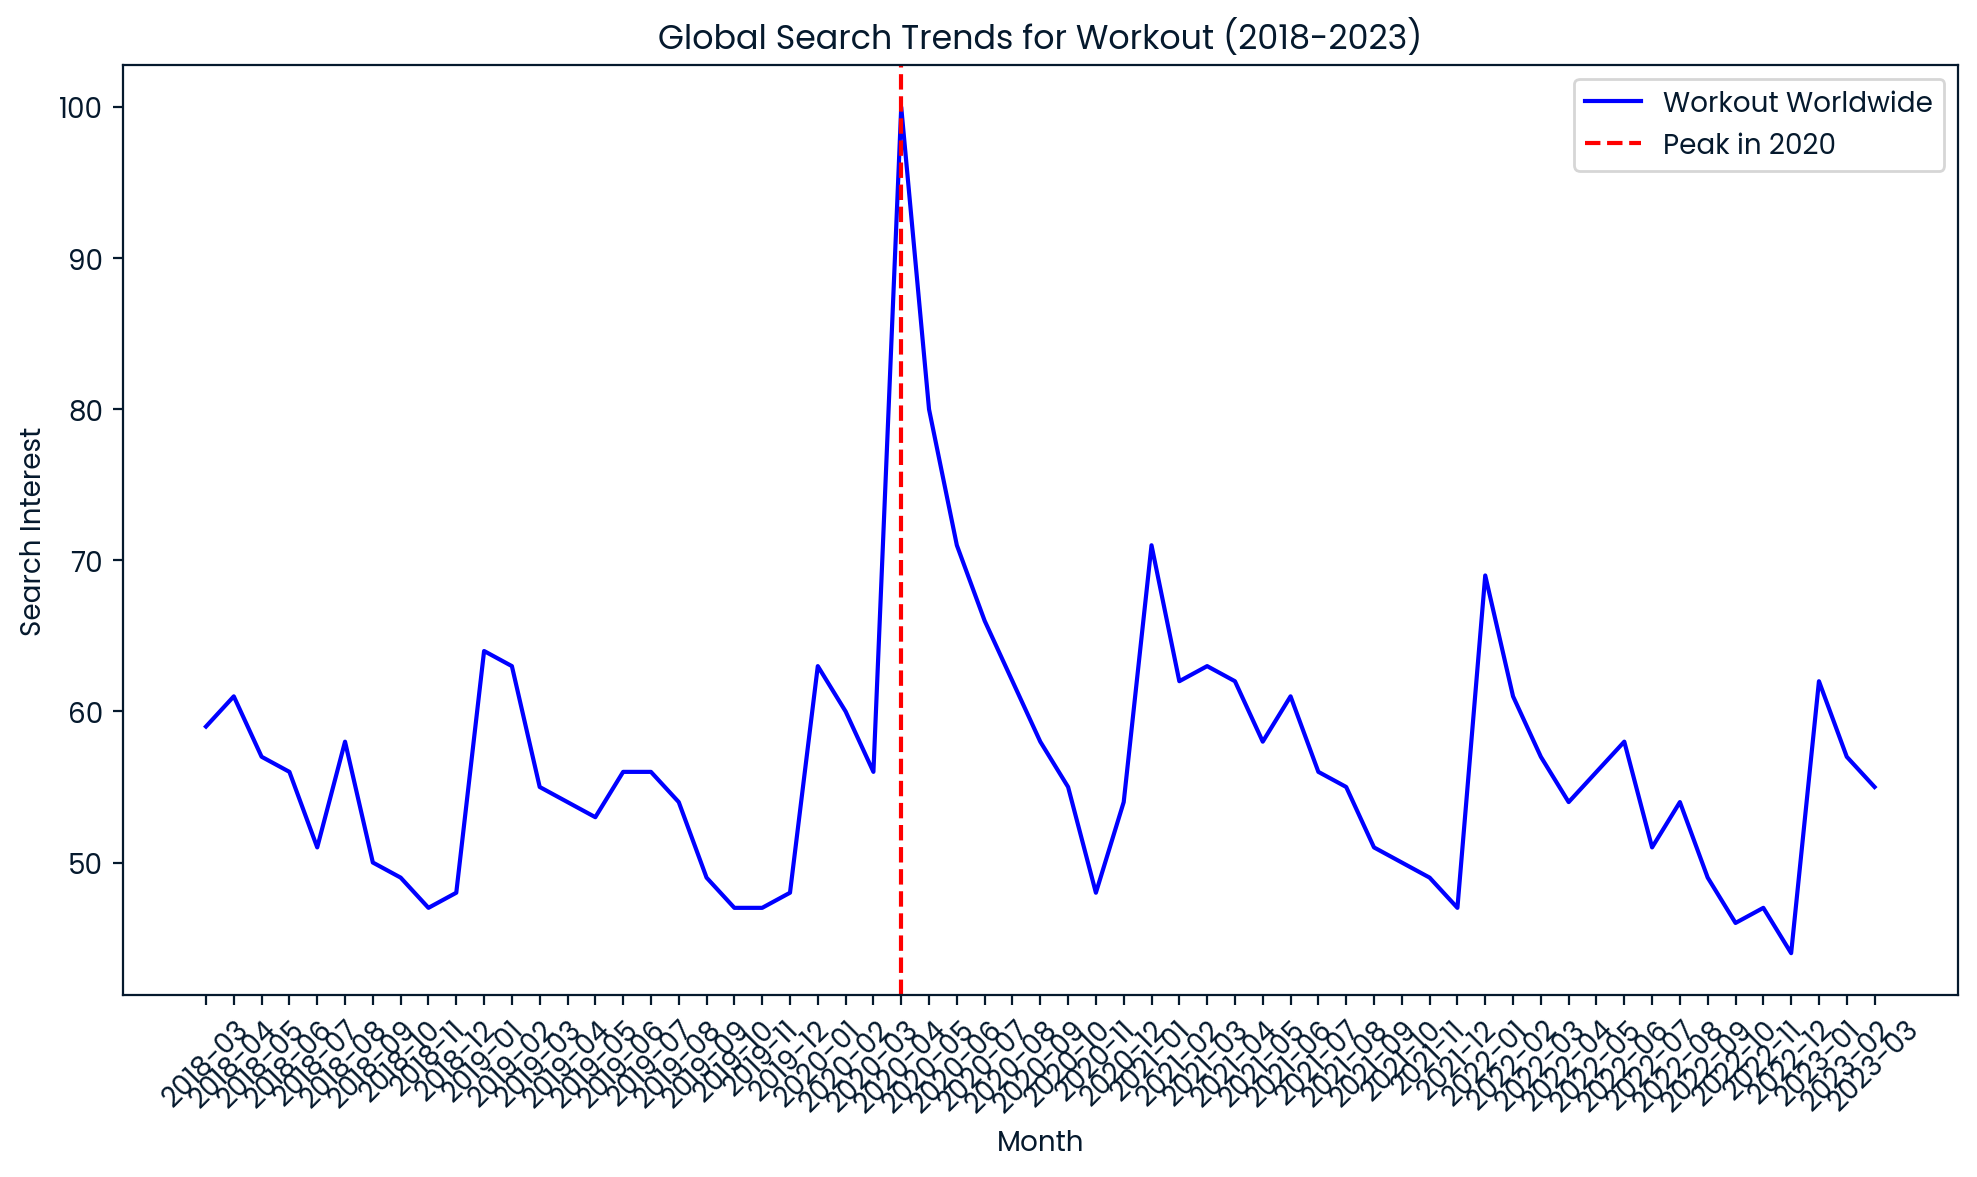

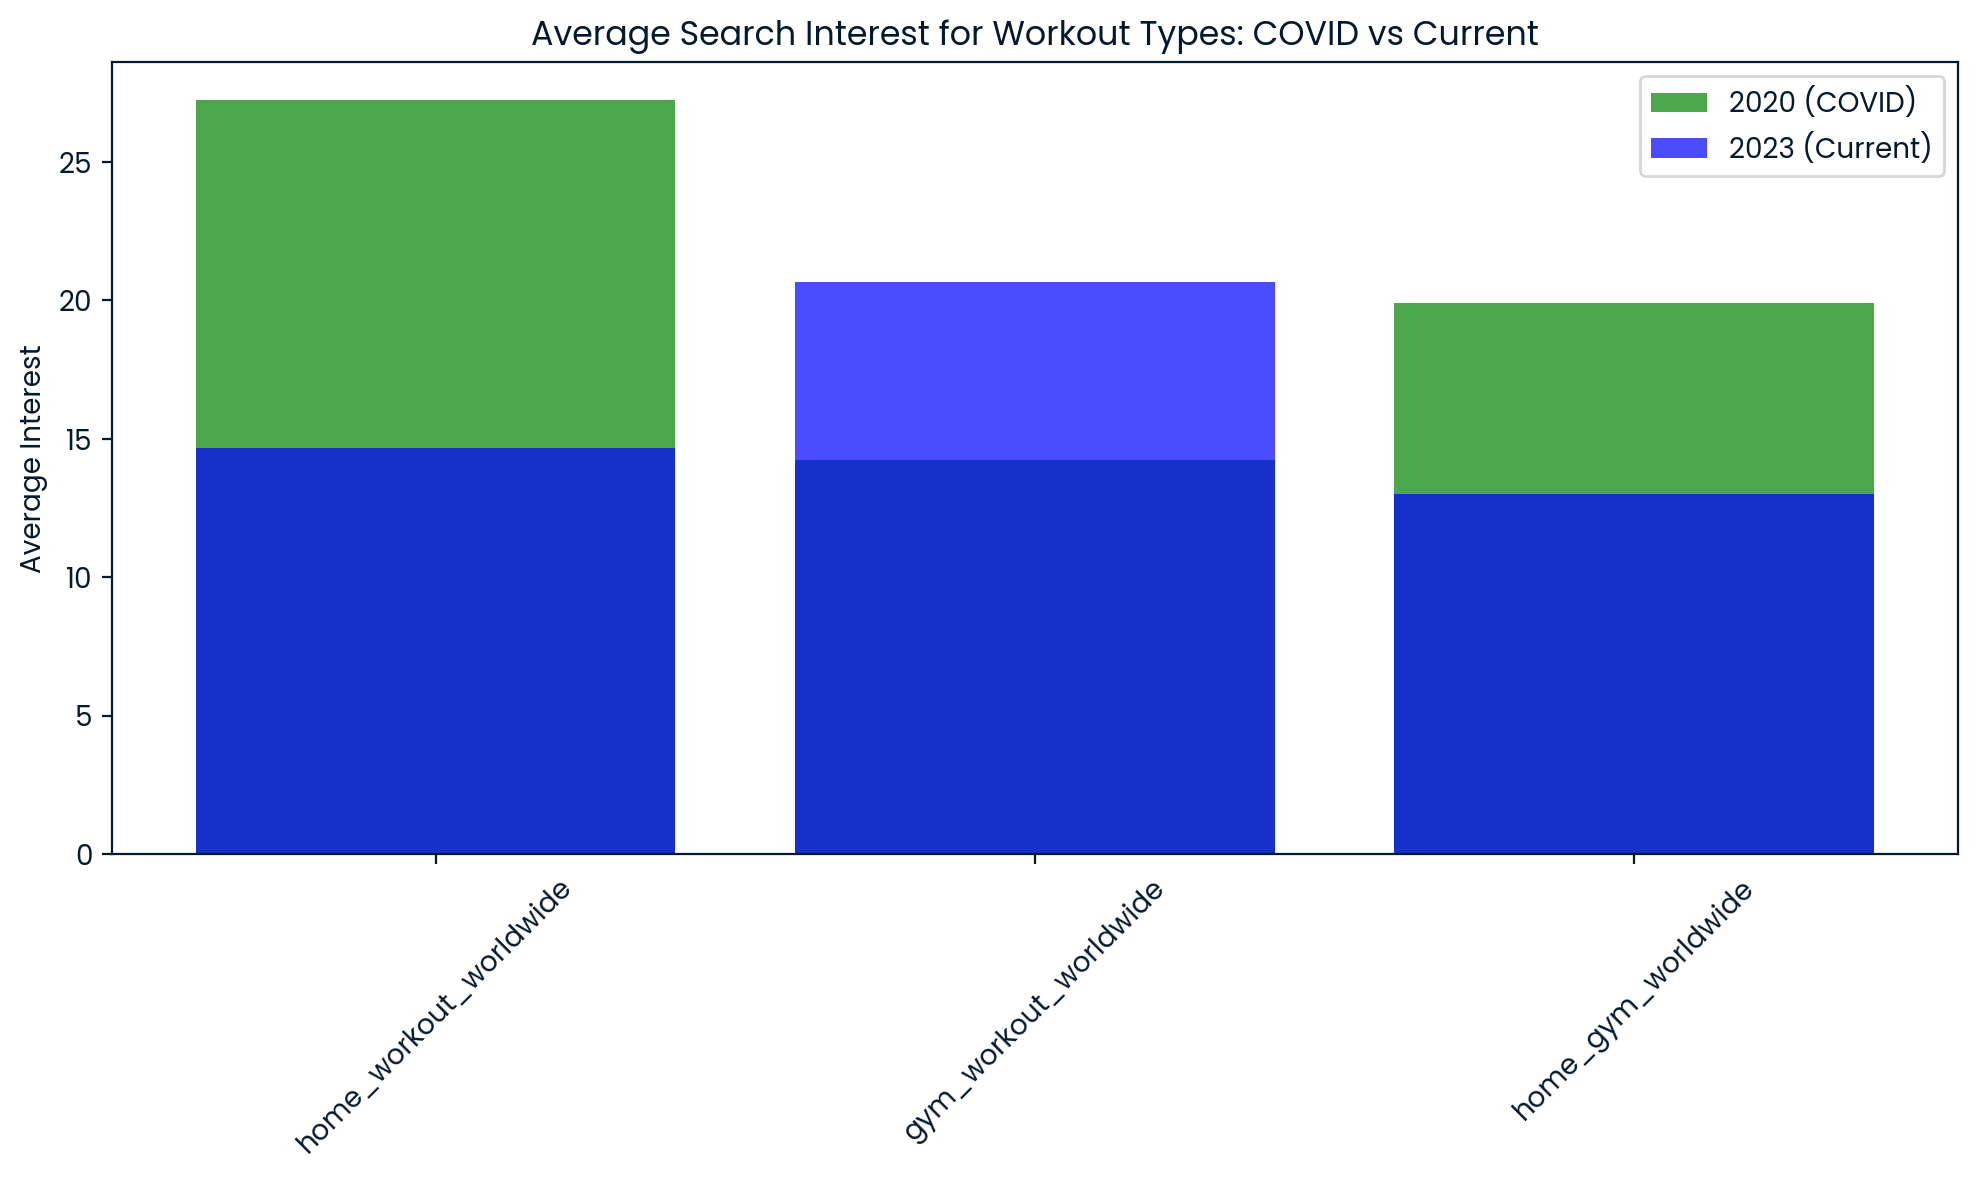

In [8]:
# Load datasets
three_keywords_geo_df = pd.read_csv('data/three_keywords_geo.csv')
three_keywords_df = pd.read_csv('data/three_keywords.csv')
workout_geo_df = pd.read_csv('data/workout_geo.csv')
workout_df = pd.read_csv('data/workout.csv')

# Identify when the global search for "workout" peaked
peak_workout = workout_df.loc[workout_df['workout_worldwide'].idxmax()]
year_str = peak_workout['month'][:4]

# Identify the most popular workout during the COVID pandemic (2020) and current times (2023)
three_keywords_2020 = three_keywords_df[three_keywords_df['month'].str.contains("2020")]
three_keywords_2023 = three_keywords_df[three_keywords_df['month'].str.contains("2023")]

peak_covid = three_keywords_2020[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean().idxmax()
current = three_keywords_2023[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean().idxmax()

# Identify the country with the highest interest for workouts among the US, Australia, and Japan
countries_of_interest = ['United States', 'Australia', 'Japan']
top_country = workout_geo_df[workout_geo_df['country'].isin(countries_of_interest)].sort_values(
    by='workout_2018_2023', ascending=False).iloc[0]['country']

# Identify whether the Philippines or Malaysia has the highest interest in home workouts
home_workout_countries = ['Philippines', 'Malaysia']
home_workout_geo = three_keywords_geo_df[
    three_keywords_geo_df['Country'].isin(home_workout_countries)
].sort_values(by='home_workout_2018_2023', ascending=False).iloc[0]['Country']

# Print results
print(f"Global workout search peak year: {year_str}")
print(f"Most popular during COVID: {peak_covid}")
print(f"Most popular now: {current}")
print(f"Top country: {top_country}")
print(f"Home workout interest: {home_workout_geo}")

# Visualization
# Plot the trends for "workout" searches worldwide
plt.figure(figsize=(10, 6))
plt.plot(workout_df['month'], workout_df['workout_worldwide'], label='Workout Worldwide', color='blue')
plt.axvline(peak_workout['month'], color='red', linestyle='--', label=f'Peak in {year_str}')
plt.title('Global Search Trends for Workout (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Search Interest')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the average interest in different workout types during 2020 (COVID) and 2023 (current)
workout_types_2020 = three_keywords_2020[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean()
workout_types_2023 = three_keywords_2023[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean()

plt.figure(figsize=(10, 6))
plt.bar(workout_types_2020.index, workout_types_2020.values, alpha=0.7, label='2020 (COVID)', color='green')
plt.bar(workout_types_2023.index, workout_types_2023.values, alpha=0.7, label='2023 (Current)', color='blue')
plt.title('Average Search Interest for Workout Types: COVID vs Current')
plt.ylabel('Average Interest')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
